# SciPy Proceedings 2017: "ChiantiPy: A Python Package for Astrophysical Spectroscopy"
This notebook provides the source to build all of the figures for the SciPy 2017 proceedings paper on ChiantiPy.

In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import pandas as pd
import periodictable
import roman

import ChiantiPy.core as ch
import ChiantiPy.tools.util as ch_util
import ChiantiPy.tools.data as ch_data
import ChiantiPy.tools.io as ch_io

%matplotlib inline

/home/wtb2/anaconda3/envs/chiantipy/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


 using cli
 using CLI for selections
 reading chiantirc file


## Database

Make a heatmap showing all of the ions in the CHIANTI database and the associated number of levels. Probably best to build a pandas dataframe first.

In [2]:
ion_list = []
exclude_dirs = ['abundance','ancillary_data','continuum','dem','ioneq','ip','masterlist','VERSION']

In [3]:
for top_dir in glob.glob('/usr/local/ssw/packages/chianti/dbase/*'):
    if os.path.basename(top_dir) not in exclude_dirs:
        for sub_dir in glob.glob(os.path.join(top_dir,'*')):
            ion = os.path.basename(sub_dir)
            if ion[-1] == 'd':
                continue
            elvlc = ch_io.elvlcRead(ion)
            if elvlc['status'] == 0:
                continue
            num_levels = np.max(elvlc['lvl'])
            tmp_name = ch_util.zion2spectroscopic(ch_util.el2z(ion.split('_')[0]),int(ion.split('_')[1]))
            element = list(filter(None,tmp_name.split(' ')))[0]
            stage = list(filter(None,tmp_name.split(' ')))[1]
            ion_list.append({'Element':element,'Stage':stage,'Levels':num_levels})

 elvlc file does not exist:  /usr/local/ssw/packages/chianti/dbase/li/li_4/li_4.elvlc
 elvlc file does not exist:  /usr/local/ssw/packages/chianti/dbase/li/li_1/li_1.elvlc
 elvlc file does not exist:  /usr/local/ssw/packages/chianti/dbase/li/li_2/li_2.elvlc
 elvlc file does not exist:  /usr/local/ssw/packages/chianti/dbase/li/li_3/li_3.elvlc
 elvlc file does not exist:  /usr/local/ssw/packages/chianti/dbase/ti/ti_23/ti_23.elvlc
 elvlc file does not exist:  /usr/local/ssw/packages/chianti/dbase/ti/ti_9/ti_9.elvlc
 elvlc file does not exist:  /usr/local/ssw/packages/chianti/dbase/ti/ti_6/ti_6.elvlc
 elvlc file does not exist:  /usr/local/ssw/packages/chianti/dbase/ti/ti_3/ti_3.elvlc
 elvlc file does not exist:  /usr/local/ssw/packages/chianti/dbase/ti/ti_4/ti_4.elvlc
 elvlc file does not exist:  /usr/local/ssw/packages/chianti/dbase/ti/ti_5/ti_5.elvlc
 elvlc file does not exist:  /usr/local/ssw/packages/chianti/dbase/ti/ti_8/ti_8.elvlc
 elvlc file does not exist:  /usr/local/ssw/packages

In [4]:
ion_table = pd.DataFrame(ion_list)
ion_table_pivot = ion_table.pivot('Element','Stage','Levels')
new_indices = sorted(ion_table_pivot.index, key=lambda x:periodictable.elements.symbol(x).number)
ion_table_pivot = ion_table_pivot.reindex(new_indices)
ion_table_pivot = ion_table_pivot.reindex_axis(sorted(ion_table_pivot.columns.tolist(),key=lambda x:roman.fromRoman(x)),axis=1)

/home/wtb2/anaconda3/envs/chiantipy/lib/python3.5/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


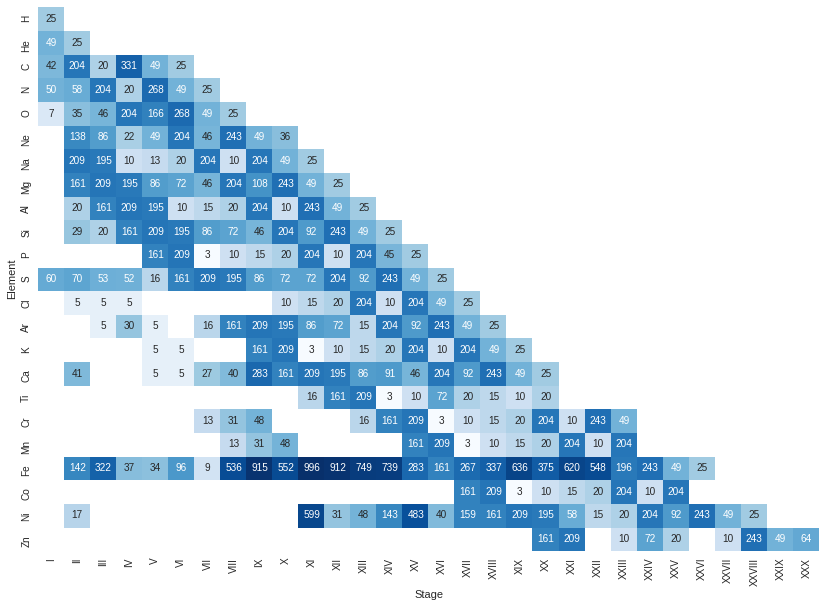

In [5]:
fig = plt.figure(figsize=(14,10))
my_cmap = plt.get_cmap('Blues')
my_cmap.set_bad(color='w')
sns.heatmap(ion_table_pivot,ax=fig.gca(),square=False,cmap=my_cmap,
            annot=True,fmt='.0f',
            norm=matplotlib.colors.LogNorm(vmin=1,vmax=1e3),
            cbar_kws={'ticks':[1,10,100,1000]},
            cbar=False
           )

## Emissivity and Level Populations

Show plot of populations for a sample ion and a plot of emissivities for a sample ion. These should be as a function of wavelength and temperature/density. We'll probably just use Fe for all of the examples to make things easy.

## Contribution Functions
First, the contribution function function in the ion class needs to be refactored. But then we should show the contribution function for a couple of ions.

## Continuum Emission

## Ionization Equilibrium
Include some equations that describe the ionization equilibrium, mention NEI (maybe). Brief example of how this is done. Could also use a refactor...

In [7]:
fe_ioneq = ch.ioneq(26)
temperature = np.logspace(4,9,500)
fe_ioneq.calculate(temperature)

 Z    26 Stage     1  ionStr fe_1
 Z    26 Stage     2  ionStr fe_2
 Z    26 Stage     3  ionStr fe_3
 Z    26 Stage     4  ionStr fe_4
 Z    26 Stage     5  ionStr fe_5
 Z    26 Stage     6  ionStr fe_6
 Z    26 Stage     7  ionStr fe_7
 Z    26 Stage     8  ionStr fe_8
 Z    26 Stage     9  ionStr fe_9
 Z    26 Stage    10  ionStr fe_10
 Z    26 Stage    11  ionStr fe_11
 Z    26 Stage    12  ionStr fe_12
 Z    26 Stage    13  ionStr fe_13
 Z    26 Stage    14  ionStr fe_14
 Z    26 Stage    15  ionStr fe_15
 Z    26 Stage    16  ionStr fe_16
 Z    26 Stage    17  ionStr fe_17
 Z    26 Stage    18  ionStr fe_18
 Z    26 Stage    19  ionStr fe_19
 Z    26 Stage    20  ionStr fe_20
 Z    26 Stage    21  ionStr fe_21
 Z    26 Stage    22  ionStr fe_22
 Z    26 Stage    23  ionStr fe_23
 Z    26 Stage    24  ionStr fe_24
 Z    26 Stage    25  ionStr fe_25
 Z    26 Stage    26  ionStr fe_26
 Z    26 Stage    27  ionStr fe_27


/home/wtb2/anaconda3/envs/chiantipy/lib/python3.5/site-packages/ChiantiPy-0.7.dev464-py3.5.egg/ChiantiPy/core/Ion.py:3864: RuntimeWarning: divide by zero encountered in double_scalars
  rat = anIon.IonizRate['rate'][it]/anIon.RecombRate['rate'][it]
/home/wtb2/anaconda3/envs/chiantipy/lib/python3.5/site-packages/ChiantiPy-0.7.dev464-py3.5.egg/ChiantiPy/core/Ion.py:3865: RuntimeWarning: divide by zero encountered in double_scalars
  factor.append(rat**2 + rat**(-2))


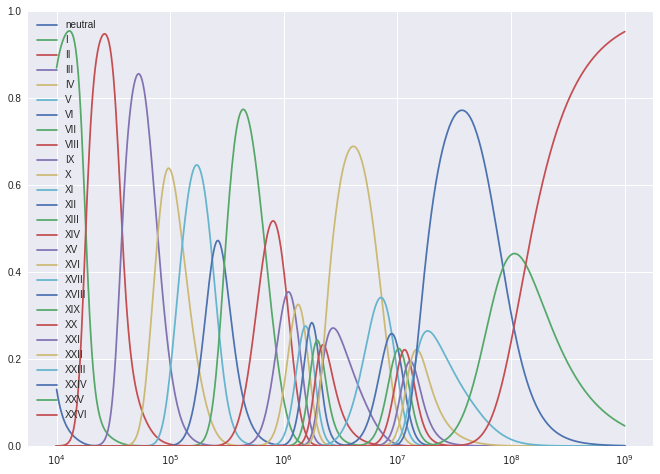

In [15]:
fig = plt.figure(figsize=(11.2,8))
ax = fig.gca()
for i in range(fe_ioneq.Ioneq.shape[0]):
    ax.plot(temperature,fe_ioneq.Ioneq[i,:],label=roman.toRoman(i) if i>0 else r'neutral')
ax.set_xscale('log')
ax.set_ylim([0,1])
ax.legend()

## Radiative Losses